In [33]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import rescale
%matplotlib inline
DATA_DIR = 'yalefaces'
#DEFAULT_IMAGE_SIZE = 77760
#DEFAULT_IMAGE_SIZE = 12416
SCALE_PARAMETER = 0.3

In [34]:
face_matrix = []
for file in os.listdir(DATA_DIR):
    #print(os.path.join(DATA_DIR,file))
    image_path = os.path.join(DATA_DIR,file)
    image = Image.open(image_path)
    image = np.asarray(image)
    image = rescale(image,SCALE_PARAMETER,mode='reflect')
    #image = image.resize((141,185),Image.ANTIALIAS)
    image_vector = image.flatten()
    #image.save("Compressed_"+file,"JPEG",optimize=True,quality=85)
    #print(np.asarray(image).shape)
    #image = Image.open("Compressed_"+file)
    #image_vector = np.asarray(image).flatten()
    
    face_matrix.append(image_vector)
#print(type(np.array(face_matrix)))
print(image.shape)
image_shape = image.shape
print(np.array(face_matrix).shape)
face_matrix = np.array(face_matrix)

(73, 96)
(165, 7008)


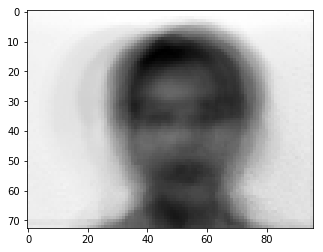

In [35]:
#print(type(face_matrix))
mean_face = face_matrix.mean(axis=0)
#print(type(mean_face[0]))
#print(mean_face.shape)
plt.imshow(mean_face.reshape(image_shape[0],image_shape[1]), cmap=plt.cm.gray)
for column in face_matrix:
    #print(column.shape)
    #print(type(column[0]))
    column = column.astype('float64')
    column -= mean_face

In [36]:
cov_face_matrix = np.dot(face_matrix.T,face_matrix)
u, s, v = np.linalg.svd(cov_face_matrix)
print(s)
eigen_faces = v
counter = 0
for eigen_face in eigen_faces:
    if (counter<10):
        plt.imshow(eigen_face.reshape(image_shape[0],image_shape[1]), cmap=plt.cm.gray)
    counter+=1

MemoryError: 